# WIND SPEED

A continuación se presenta el ánalisis y modelado resultante de una recopilación de datos de mediciondes de la velocidad del viento. El tema propuesto tiene amplias implicaciones en varias áreas, el análisis se enfoca en el impacto para la producción de energía eólica, la cual al ser une energía limpia contribuye a la sostenibilidad ambiental.

### EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
wind_path = r"C:\MariaP\MachineLearning\Parcial\Data\wind\data_treino_dv_df_2000_2010.csv"
wind = pd.read_csv(wind_path, encoding= "UTF-8")

In [4]:
wind.head()

HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

Como se puede observar las columnas tienen carácteres especiales/extraños, se procederá a cambiar los títulos de las columnas para un mejor entendimiento

In [5]:
nombres_originales = wind.columns.tolist()
nuevos_nombres = ['Hora', 'Dirección del viento horaria', 'Velocidad horario del viento (m/s)', "Humedad rel. máx. hora anterior (AUT) ( %)",
                  "Humedad rel. mín. hora anterior (AUT) ( %)", "Temperatura máx. hora anterior (AUT)(℃)", 
                  "Temperatura mín. hora anterior (AUT)( ℃)", "Humedad relativa horaria ( %)", 
                  "Presión atmosférica a nivel de estación, horaria (mB)", "Precipitación total por hora (mm)", 
                  "Máxima ráfaga de viento (m/s)", "Presión atmosférica máx. hora anterior (AUT) (mB)", 
                  "Presión atmosférica mín. hora anterior (AUT) (mB)"]

nuevos_nombres_dict = {nombres_originales[i]: nuevos_nombres[i] for i in range(len(nombres_originales))}
wind.rename(columns=nuevos_nombres_dict, inplace=True)
wind.head()

Hora  Dirección del viento horaria  Velocidad horario del viento (m/s)  \
0  12:00                      0.809017                                 1.8   
1  13:00                      0.965926                                 2.7   
2  14:00                      0.891007                                 2.0   
3  15:00                      0.848048                                 2.5   
4  16:00                      0.224951                                 2.4   

   Humedad rel. máx. hora anterior (AUT) ( %)  \
0                                        69.0   
1                                        62.0   
2                                        56.0   
3                                        52.0   
4                                        50.0   

   Humedad rel. mín. hora anterior (AUT) ( %)  \
0                                        60.0   
1                                        55.0   
2                                        50.0   
3                                        44.0   
4                                        43.0   

   Temperatura máx. hora anterior (AUT)(℃)  \
0                                     22.6   
1                                     24.2   
2                                     25.5   
3                                     27.4   
4                                     27.1   

   Temperatura mín. hora anterior (AUT)( ℃)  Humedad relativa horaria ( %)  \
0                                      20.7                           61.0   
1                                      22.5                           55.0   
2                                      24.3                           51.0   
3                                      25.0                           44.0   
4                                      25.5                           46.0   

   Presión atmosférica a nivel de estación, horaria (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   Precipitación total por hora (mm)  Máxima ráfaga de viento (m/s)  \
0                                0.0                            3.8   
1                                0.0                            4.7   
2                                0.0                            4.9   
3                                0.0                            5.8   
4                                0.0                            5.8   

   Presión atmosférica máx. hora anterior (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   Presión atmosférica mín. hora anterior (AUT) (mB)  
0                                              887.7  
1                                              888.2  
2                                              888.1  
3                                              887.4  
4                                              886.5

Por lo que se aprecia al mostrar las primeras columnas, es que todos los daton son númericos. Vamos a verificarlo:

In [6]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Hora                                                   87693 non-null  object 
 1   Dirección del viento horaria                           87693 non-null  float64
 2   Velocidad horario del viento (m/s)                     87693 non-null  float64
 3   Humedad rel. máx. hora anterior (AUT) ( %)             87693 non-null  float64
 4   Humedad rel. mín. hora anterior (AUT) ( %)             87693 non-null  float64
 5   Temperatura máx. hora anterior (AUT)(℃)                87693 non-null  float64
 6   Temperatura mín. hora anterior (AUT)( ℃)               87693 non-null  float64
 7   Humedad relativa horaria ( %)                          87693 non-null  float64
 8   Presión atmosférica a nivel de estación, horar

La variable hora es de tipo objeto, se convertirá a númerico para facilitar su procesamiento.

In [7]:
wind.Hora.unique()

array(['12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00',
       '19:00', '20:00', '21:00', '22:00', '23:00', '00:00', '01:00',
       '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00',
       '09:00', '10:00', '11:00'], dtype=object)

In [8]:
wind["Hora"] = wind["Hora"].apply(lambda x: pd.to_datetime(x).time().hour)

In [9]:
wind.Hora.unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [10]:
print("La información tiene {} filas y {} columnas".format(wind.shape[0], wind.shape[1]))

La información tiene 87693 filas y 13 columnas


In [11]:
wind.describe().T

count        mean  \
Hora                                                87693.0   11.506437   
Dirección del viento horaria                        87693.0    0.405810   
Velocidad horario del viento (m/s)                  87693.0    2.466192   
Humedad rel. máx. hora anterior (AUT) ( %)          87693.0   69.058465   
Humedad rel. mín. hora anterior (AUT) ( %)          87693.0   63.176194   
Temperatura máx. hora anterior (AUT)(℃)             87693.0   21.921264   
Temperatura mín. hora anterior (AUT)( ℃)            87693.0   20.684570   
Humedad relativa horaria ( %)                       87693.0   66.146682   
Presión atmosférica a nivel de estación, horari...  87693.0  887.251925   
Precipitación total por hora (mm)                   87693.0    0.160907   
Máxima ráfaga de viento (m/s)                       87693.0    5.161076   
Presión atmosférica máx. hora anterior (AUT) (mB)   87693.0  887.580724   
Presión atmosférica mín. hora anterior (AUT) (mB)   87693.0  886.891093   

                                                          std    min  \
Hora                                                 6.932300    0.0   
Dirección del viento horaria                         0.686247   -1.0   
Velocidad horario del viento (m/s)                   1.313968    0.0   
Humedad rel. máx. hora anterior (AUT) ( %)          19.640222   12.0   
Humedad rel. mín. hora anterior (AUT) ( %)          20.166336   10.0   
Temperatura máx. hora anterior (AUT)(℃)              3.721386    9.2   
Temperatura mín. hora anterior (AUT)( ℃)             3.513744    8.4   
Humedad relativa horaria ( %)                       19.992327   10.0   
Presión atmosférica a nivel de estación, horari...   4.012404  863.4   
Precipitación total por hora (mm)                    1.307515    0.0   
Máxima ráfaga de viento (m/s)                        2.311157    0.0   
Presión atmosférica máx. hora anterior (AUT) (mB)    3.646750  865.3   
Presión atmosférica mín. hora anterior (AUT) (mB)    3.564539  862.8   

                                                           25%         50%  \
Hora                                                  5.000000   12.000000   
Dirección del viento horaria                         -0.156434    0.788011   
Velocidad horario del viento (m/s)                    1.500000    2.400000   
Humedad rel. máx. hora anterior (AUT) ( %)           54.000000   72.000000   
Humedad rel. mín. hora anterior (AUT) ( %)           48.000000   64.000000   
Temperatura máx. hora anterior (AUT)(℃)              19.200000   21.400000   
Temperatura mín. hora anterior (AUT)( ℃)             18.400000   20.200000   
Humedad relativa horaria ( %)                        51.000000   68.000000   
Presión atmosférica a nivel de estación, horari...  885.300000  887.200000   
Precipitación total por hora (mm)                     0.000000    0.000000   
Máxima ráfaga de viento (m/s)                         3.400000    5.000000   
Presión atmosférica máx. hora anterior (AUT) (mB)   885.600000  887.500000   
Presión atmosférica mín. hora anterior (AUT) (mB)   885.000000  886.900000   

                                                           75%     max  
Hora                                                 18.000000    23.0  
Dirección del viento horaria                          0.970296     1.0  
Velocidad horario del viento (m/s)                    3.400000    10.0  
Humedad rel. máx. hora anterior (AUT) ( %)           87.000000   100.0  
Humedad rel. mín. hora anterior (AUT) ( %)           80.000000    98.0  
Temperatura máx. hora anterior (AUT)(℃)              24.700000    35.3  
Temperatura mín. hora anterior (AUT)( ℃)             23.100000    34.4  
Humedad relativa horaria ( %)                        84.000000    99.0  
Presión atmosférica a nivel de estación, horari...  889.100000  1023.5  
Precipitación total por hora (mm)                     0.000000    70.8  
Máxima ráfaga de viento (m/s)                         6.800000    24.3  
Presión atmosférica máx. 

- ***Hora***: La hora como sabemos toma valores de 0 a 23 que corresponden a las horas de un día (min y max).

- ***Dirección del viento horaria***: La dirección va desde [-1 a 1], por los valores que toma la media y la mediana (0.4 y 0.78) podemos concluir que la dirección tiende a ser más en sentido positiva (+1).

- ***Velocidad horario del viento (m/s)***: Es la variable objetivo, la cual depende de diversas condiciones meteorológicas. Para los datos en cuestión, tenemos una media de 2.46 (m/s), con una desviación de 1.31, se evidencia la presencia de valores extremos puesto que el 75% de los datos es menor a 3.4 m/s pero el máximo observado corresponde a 10 m/s. Así mismo, existe un leve sesgo hacia la derecha.

- ***Humedades***: Van en un rango de 0 a 100 al presentarse en %. Corresponen a la humedad relativa horaria, humedad relativa mínima y máxima de la hora anterior; estas presentan datos similares y por la definición de las variables es muy probable que se encuentren correlacionadas.

- ***Temperatura***: Corresponde a la temperatura máxima y mínima de la hora anterior, ambas presentan valores similares y también se podría decir que se encuentran correlacionadas. Los valores de temperatura oscilan entre 8.4 °C y 35.3°C.

- ***Presión atmosférica a nivel de estación, horaria (mB)***: La media corresponde a 887 con una desviación estándar muy baja (4), se podría asumir que las mediciones se encuentran en lugares por encima del nivel del mar, puesto que al nivel del mar la presión es aprox 1013.25 milibares (mB).

- ***Precipitación total por hora (mm)***: Podemos concluir que en al menos el 75% de las observaciones no había precipitación.

- ***Máxima ráfaga de viento (m/s)***: Los valores se encuentran entre 0 y 24.3 m/s, con una media de 3.64 m/s.

Se revisará la correlación más adelante.

A continuación revisaremos datos faltantes.

In [12]:
#Datos faltantes
valores_faltantes = wind.isnull().sum()
porcentaje_faltantes = (valores_faltantes/wind.shape[0])*100
Faltantes = pd.DataFrame({ 'Valores Faltantes': valores_faltantes, 'Porcentaje Faltantes': porcentaje_faltantes}).sort_values(by = "Porcentaje Faltantes", ascending = False)
Faltantes

Valores Faltantes  \
Hora                                                                0   
Dirección del viento horaria                                        0   
Velocidad horario del viento (m/s)                                  0   
Humedad rel. máx. hora anterior (AUT) ( %)                          0   
Humedad rel. mín. hora anterior (AUT) ( %)                          0   
Temperatura máx. hora anterior (AUT)(℃)                             0   
Temperatura mín. hora anterior (AUT)( ℃)                            0   
Humedad relativa horaria ( %)                                       0   
Presión atmosférica a nivel de estación, horari...                  0   
Precipitación total por hora (mm)                                   0   
Máxima ráfaga de viento (m/s)                                       0   
Presión atmosférica máx. hora anterior (AUT) (mB)                   0   
Presión atmosférica mín. hora anterior (AUT) (mB)                   0   

                                                    Porcentaje Faltantes  
Hora                                                                 0.0  
Dirección del viento horaria                                         0.0  
Velocidad horario del viento (m/s)                                   0.0  
Humedad rel. máx. hora anterior (AUT) ( %)                           0.0  
Humedad rel. mín. hora anterior (AUT) ( %)                           0.0  
Temperatura máx. hora anterior (AUT)(℃)                              0.0  
Temperatura mín. hora anterior (AUT)( ℃)                             0.0  
Humedad relativa horaria ( %)                                        0.0  
Presión atmosférica a nivel de estación, horari...                   0.0  
Precipitación total por hora (mm)                                    0.0  
Máxima ráfaga de viento (m/s)                                        0.0  
Presión atmosférica máx. hora anterior (AUT) (mB)                    0.0  
Presión atmosférica mín. hora anterior (AUT) (mB)                    0.0

No se presentan datos faltantes en la información (:

Procederemos a revisar la distribución de la variable objetivo.

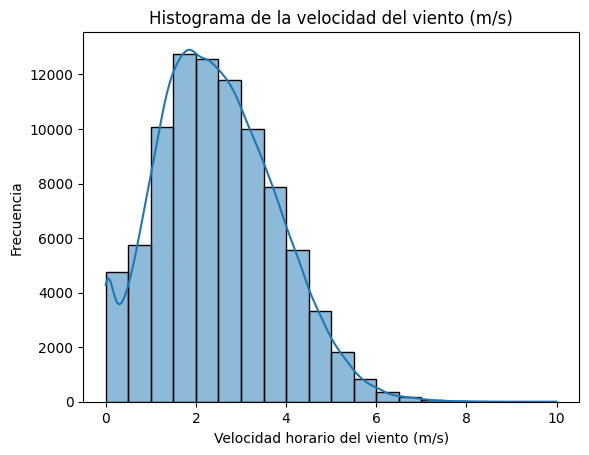

In [13]:
sns.histplot(wind['Velocidad horario del viento (m/s)'], bins = 20, kde=True) 
plt.title('Histograma de la velocidad del viento (m/s)')
plt.ylabel("Frecuencia")
plt.show()

La velocidad del viento presenta un sesgo hacia la derecha, como se observó en la sección anterior. Los valores más frecuenta están están entre 1.5 y 3 m/s.

A continuación, revisaremos la correlación de las variables.

<Axes: >

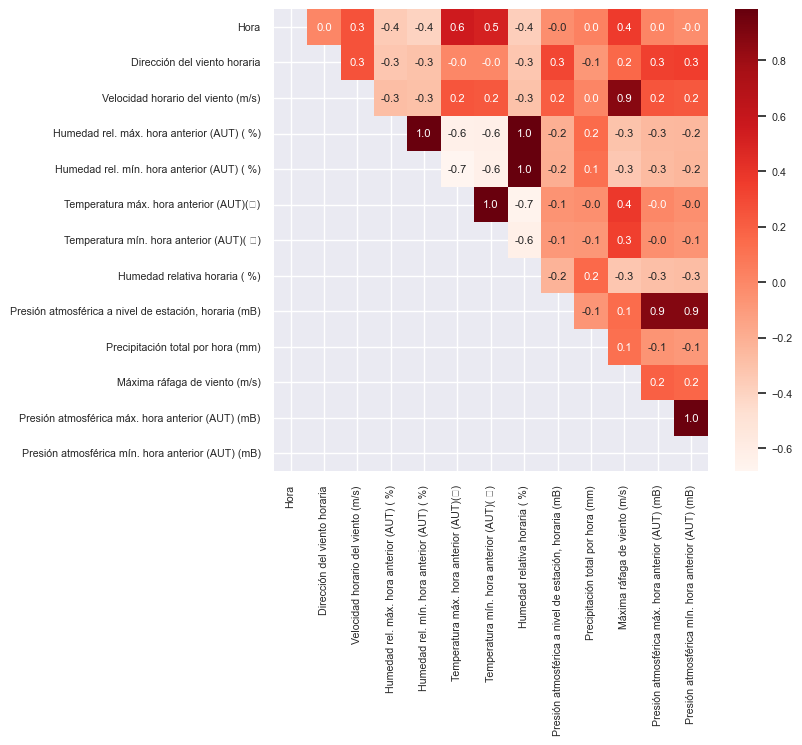

In [14]:
corr = wind.corr()
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
sns.set(font_scale=0.7)
plt.figure(figsize=(7,6))
sns.heatmap(corr, mask = mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Se observa una gran relación entre las variables de presión, temperaturas y humedades (como era de esperarse, al tratarse de mediciones de la misma índole en períodos cercanos).
Así mismo, adelantandonos un poco la máxima ráfaga parece tener una gran influencia en la variable respuesta de velocidad del viento.

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
#Calcular el VIF
#Quitar la columna de la variable respuesta del cálculo del VIF
X = wind.drop("Velocidad horario del viento (m/s)", axis = 1)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Muestra el DataFrame con los resultados del VIF
print(vif_data)


                                             Variable           VIF
0                                                Hora      1.535066
1                        Dirección del viento horaria      1.312001
2          Humedad rel. máx. hora anterior (AUT) ( %)     77.951749
3          Humedad rel. mín. hora anterior (AUT) ( %)     80.849151
4             Temperatura máx. hora anterior (AUT)(℃)     68.492554
5            Temperatura mín. hora anterior (AUT)( ℃)     57.283224
6                       Humedad relativa horaria ( %)     51.851514
7   Presión atmosférica a nivel de estación, horar...      4.900754
8                   Precipitación total por hora (mm)      1.122183
9                       Máxima ráfaga de viento (m/s)      1.325654
10  Presión atmosférica máx. hora anterior (AUT) (mB)     16.065974
11  Presión atmosférica mín. hora anterior (AUT) (mB)     16.499324
12                                          Intercept  83890.268999


Se procederá a eliminar la variable "Humedad rel. mín. hora anterior (AUT) ( %)" al tener el mayor valor de VIF. El intercepto no aplica porque fue creado sintéticamente. 

In [17]:
#Calcular el VIF nuevamente sin la variable con mayor VIF
#Quitar la columna de la variable respuesta del cálculo del VIF
X = wind.drop(["Velocidad horario del viento (m/s)","Humedad rel. mín. hora anterior (AUT) ( %)"], axis = 1)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Muestra el DataFrame con los resultados del VIF
print(vif_data)

                                             Variable           VIF
0                                                Hora      1.529583
1                        Dirección del viento horaria      1.311674
2          Humedad rel. máx. hora anterior (AUT) ( %)     41.754347
3             Temperatura máx. hora anterior (AUT)(℃)     30.834055
4            Temperatura mín. hora anterior (AUT)( ℃)     26.788844
5                       Humedad relativa horaria ( %)     46.388935
6   Presión atmosférica a nivel de estación, horar...      4.900632
7                   Precipitación total por hora (mm)      1.122181
8                       Máxima ráfaga de viento (m/s)      1.325499
9   Presión atmosférica máx. hora anterior (AUT) (mB)     16.044685
10  Presión atmosférica mín. hora anterior (AUT) (mB)     16.492733
11                                          Intercept  83673.291686


In [18]:
#Calcular el VIF nuevamente sin las dos variables
#Quitar la columna de la variable respuesta del cálculo del VIF
X = wind.drop(["Velocidad horario del viento (m/s)","Humedad rel. mín. hora anterior (AUT) ( %)", "Humedad relativa horaria ( %)"], axis = 1)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Muestra el DataFrame con los resultados del VIF
print(vif_data)


                                             Variable           VIF
0                                                Hora      1.529275
1                        Dirección del viento horaria      1.304670
2          Humedad rel. máx. hora anterior (AUT) ( %)      2.202492
3             Temperatura máx. hora anterior (AUT)(℃)     23.263067
4            Temperatura mín. hora anterior (AUT)( ℃)     21.399361
5   Presión atmosférica a nivel de estación, horar...      4.900185
6                   Precipitación total por hora (mm)      1.095933
7                       Máxima ráfaga de viento (m/s)      1.325465
8   Presión atmosférica máx. hora anterior (AUT) (mB)     16.031246
9   Presión atmosférica mín. hora anterior (AUT) (mB)     16.477030
10                                          Intercept  80340.737266


In [19]:
#Calcular el VIF nuevamente sin las tres variables
#Quitar la columna de la variable respuesta del cálculo del VIF
X = wind.drop(["Velocidad horario del viento (m/s)","Humedad rel. mín. hora anterior (AUT) ( %)", "Humedad relativa horaria ( %)", 
    "Temperatura máx. hora anterior (AUT)(℃)"], axis = 1)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Muestra el DataFrame con los resultados del VIF
print(vif_data)

                                            Variable           VIF
0                                               Hora      1.459161
1                       Dirección del viento horaria      1.292438
2         Humedad rel. máx. hora anterior (AUT) ( %)      2.143679
3           Temperatura mín. hora anterior (AUT)( ℃)      2.222538
4  Presión atmosférica a nivel de estación, horar...      4.899953
5                  Precipitación total por hora (mm)      1.071249
6                      Máxima ráfaga de viento (m/s)      1.314166
7  Presión atmosférica máx. hora anterior (AUT) (mB)     15.705527
8  Presión atmosférica mín. hora anterior (AUT) (mB)     16.232106
9                                          Intercept  80075.448386


In [20]:
#Calcular el VIF nuevamente sin las cuatro variables
#Quitar la columna de la variable respuesta del cálculo del VIF
X = wind.drop(["Velocidad horario del viento (m/s)","Humedad rel. mín. hora anterior (AUT) ( %)", "Humedad relativa horaria ( %)", 
    "Temperatura máx. hora anterior (AUT)(℃)", "Presión atmosférica mín. hora anterior (AUT) (mB)"], axis = 1)
X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Muestra el DataFrame con los resultados del VIF
print(vif_data)

                                            Variable           VIF
0                                               Hora      1.444186
1                       Dirección del viento horaria      1.288093
2         Humedad rel. máx. hora anterior (AUT) ( %)      2.135348
3           Temperatura mín. hora anterior (AUT)( ℃)      2.215522
4  Presión atmosférica a nivel de estación, horar...      4.552489
5                  Precipitación total por hora (mm)      1.067204
6                      Máxima ráfaga de viento (m/s)      1.314117
7  Presión atmosférica máx. hora anterior (AUT) (mB)      4.721712
8                                          Intercept  75664.101989


In [21]:
wind = wind.drop(["Humedad rel. mín. hora anterior (AUT) ( %)", "Humedad relativa horaria ( %)", 
    "Temperatura máx. hora anterior (AUT)(℃)", "Presión atmosférica mín. hora anterior (AUT) (mB)"], axis=1)
wind.head()

Hora  Dirección del viento horaria  Velocidad horario del viento (m/s)  \
0    12                      0.809017                                 1.8   
1    13                      0.965926                                 2.7   
2    14                      0.891007                                 2.0   
3    15                      0.848048                                 2.5   
4    16                      0.224951                                 2.4   

   Humedad rel. máx. hora anterior (AUT) ( %)  \
0                                        69.0   
1                                        62.0   
2                                        56.0   
3                                        52.0   
4                                        50.0   

   Temperatura mín. hora anterior (AUT)( ℃)  \
0                                      20.7   
1                                      22.5   
2                                      24.3   
3                                      25.0   
4                                      25.5   

   Presión atmosférica a nivel de estación, horaria (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   Precipitación total por hora (mm)  Máxima ráfaga de viento (m/s)  \
0                                0.0                            3.8   
1                                0.0                            4.7   
2                                0.0                            4.9   
3                                0.0                            5.8   
4                                0.0                            5.8   

   Presión atmosférica máx. hora anterior (AUT) (mB)  
0                                              888.2  
1                                              888.4  
2                                              888.4  
3                                              888.1  
4                                              887.4

<Axes: >

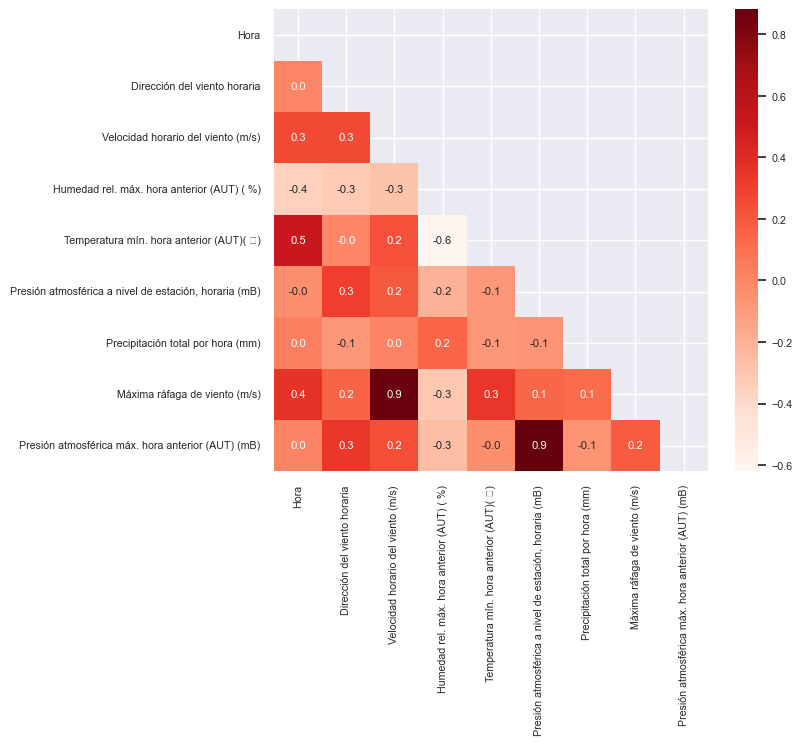

In [22]:
corr = wind.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=0.7)
plt.figure(figsize=(7,6))
sns.heatmap(corr, mask = mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

A criterio propio eliminaré la variable Presión atmosférica máx. hora anterior (AUT)(mB), al seguir presentando una alta correlación. No se eliminó con el VIF porque este mide la relación de esa variable con dos o más.

Después de revisar el Factor de Inflación de Varianza, solo trabajaremos con 7 columnas (aquellas que tuvieron un VIF <5).

In [23]:
wind = wind.drop("Presión atmosférica máx. hora anterior (AUT) (mB)", axis=1)
wind.head()

Hora  Dirección del viento horaria  Velocidad horario del viento (m/s)  \
0    12                      0.809017                                 1.8   
1    13                      0.965926                                 2.7   
2    14                      0.891007                                 2.0   
3    15                      0.848048                                 2.5   
4    16                      0.224951                                 2.4   

   Humedad rel. máx. hora anterior (AUT) ( %)  \
0                                        69.0   
1                                        62.0   
2                                        56.0   
3                                        52.0   
4                                        50.0   

   Temperatura mín. hora anterior (AUT)( ℃)  \
0                                      20.7   
1                                      22.5   
2                                      24.3   
3                                      25.0   
4                                      25.5   

   Presión atmosférica a nivel de estación, horaria (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   Precipitación total por hora (mm)  Máxima ráfaga de viento (m/s)  
0                                0.0                            3.8  
1                                0.0                            4.7  
2                                0.0                            4.9  
3                                0.0                            5.8  
4                                0.0                            5.8

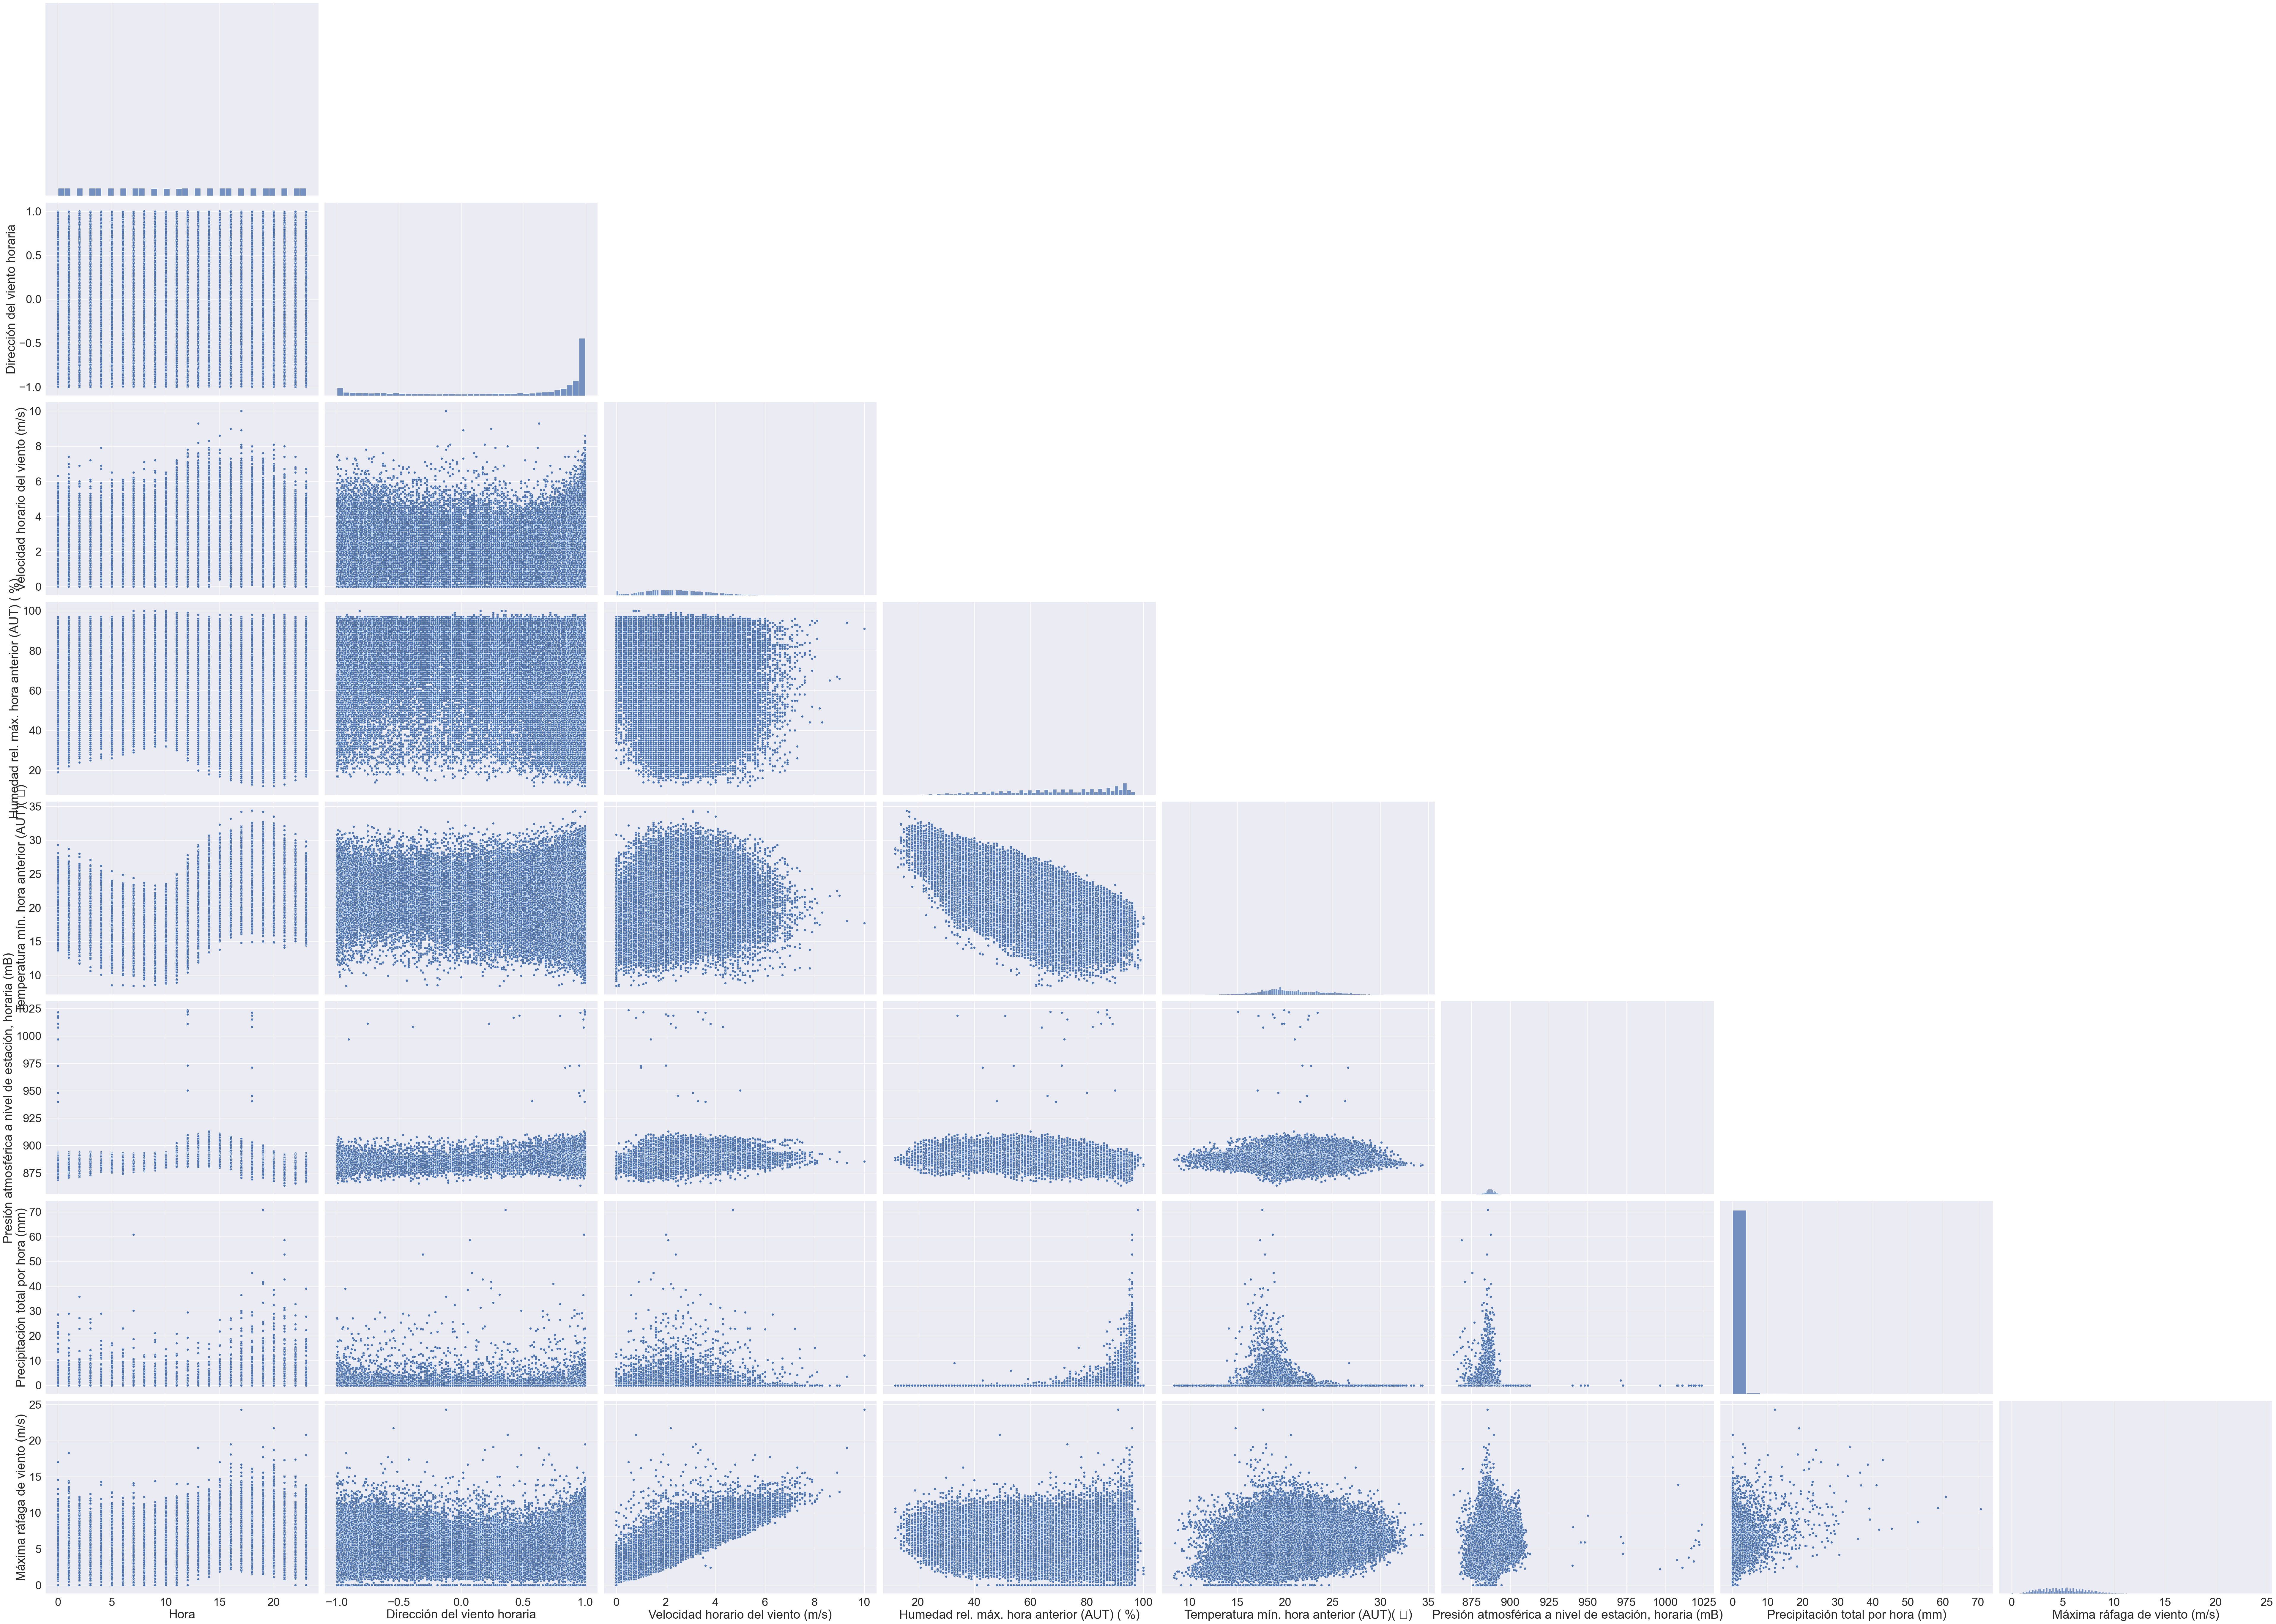

In [24]:
sns.set(font_scale=2.5)
sns.pairplot(data=wind, palette='viridis', corner=True, height=7.0, aspect=1.4)


El gráfico de dispersión muestra que de acuerdo a la hora del día las mediciones meteorológicas varían. 

Por otro lado, la dirección del viento no parece verse afectada por las otras variables (se abarca todo el rango de -1 a 1 de manera al variar los valores de una misma variable).

La presión atmósferica presenta algunos valores atípicos.

Revisemos los histogramas y diagramas de caja de las variables.

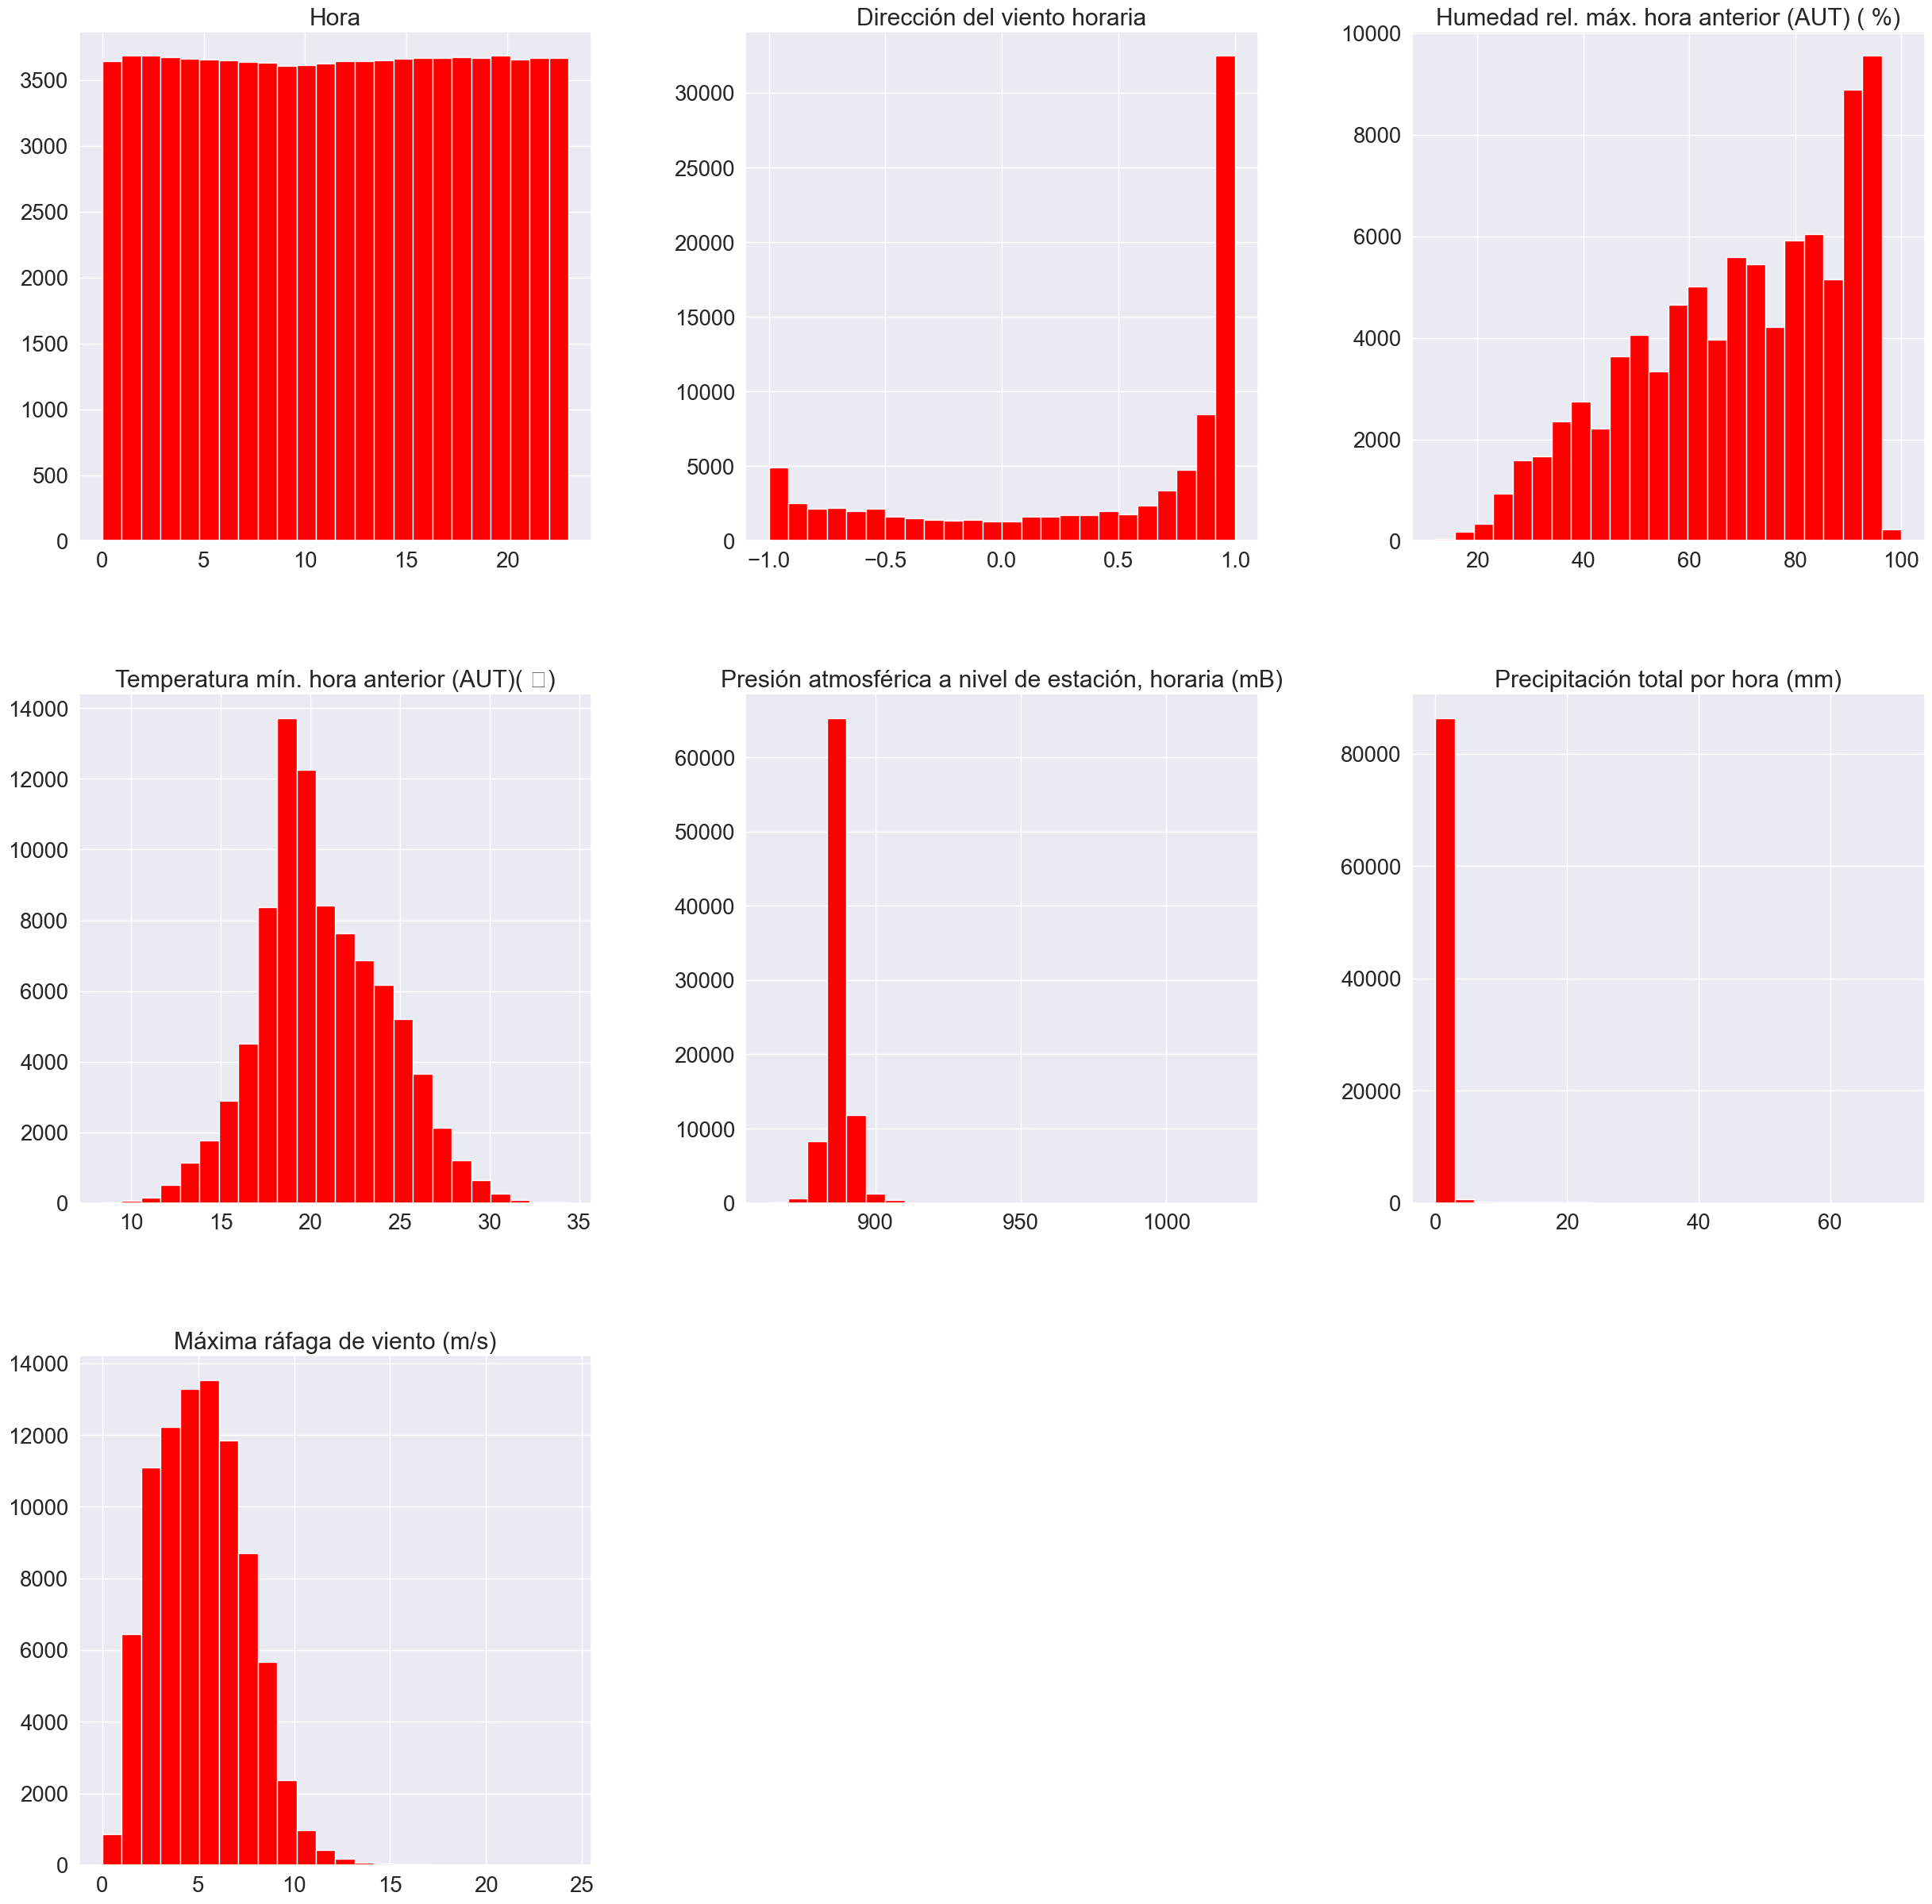

In [25]:
sns.set(font_scale=1.8)
wind.iloc[: , [0, 1, 3, 4, 5, 6, 7]].hist(figsize = (30,30), color = 'red', bins = 24);

- Se cuenta con obseervaciones en toda la zona horaria, y de manera balanceada a lo largo del día.
- La dirección del viento predominante es la +1.
- Aumenta la frecuencia de la humedad a medida que se incrementa el %.
- La temperatura más frecuente está al rededor de los 20°C.
- Los valores de presión atomósferica son bastante cercanos entre sí.
- En esta área no suele haber precipitaciones.
- La máxima ráfaga suele estar en valores inferiores a 10 m/s.

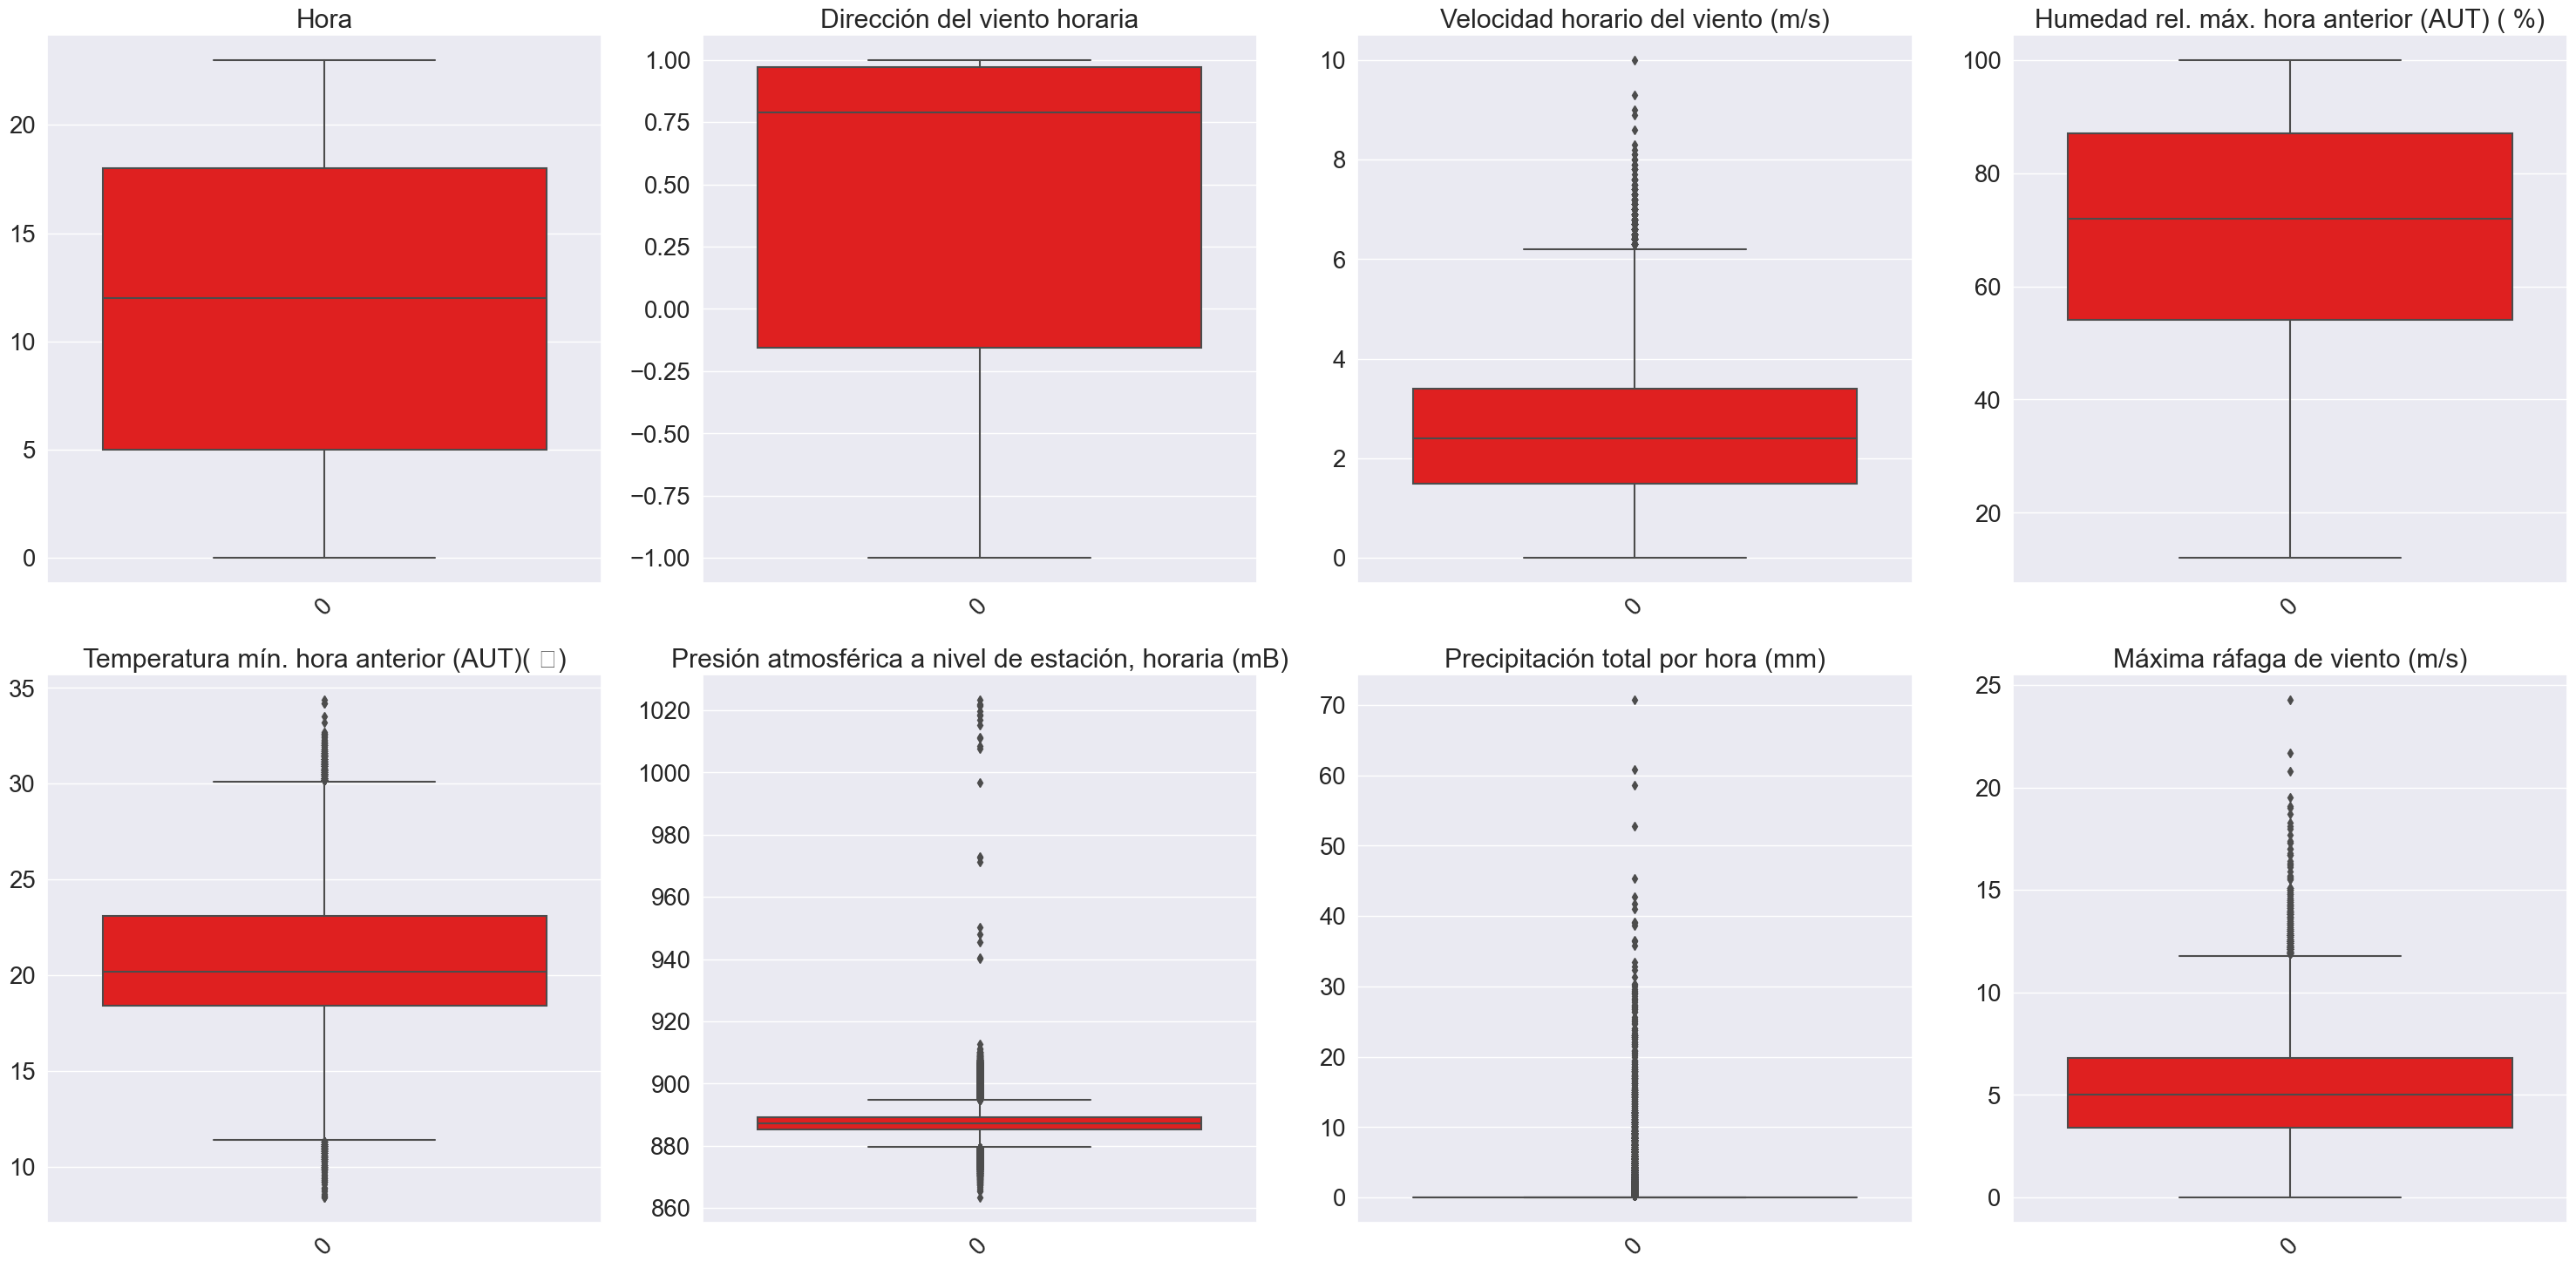

In [26]:
plt.figure(figsize=(30, 15))
for i, column in enumerate(wind.columns):
    plt.subplot(2, 4, i + 1)  
    sns.boxplot(data=wind[column], color='red')
    plt.title(f'{column}')
    plt.xticks(rotation=45)  # Rotación de etiquetas del eje x si es necesario

plt.tight_layout()  # Ajusta la disposición de los subplots
plt.show()

Los diagramas de caja complementan toda la información observada hasta el momento, observamos valores altos y poco frecuentes en precipitación (esta región parece caracterizarse por pocas lluvias), en presiones atmósfericas, en temperaturas tanto altas como bajas. 
Se observa poca varibilidad en la presión atmósferica. 

### **MODELADO**

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
import math


Debido a la gran cantidad de datos, se utilizará solo la última mitad de estos.

In [28]:
#Se dividen los datos en training y testing
wind_training = wind.drop(wind.tail(24).index)
wind_testing = wind.tail(24)

In [30]:
# Se calcula el número de datos que va a tener la nueva base de datos de wind para el modelado
#Por cuestiones de computo se trabajará con la mitad de los datos
particiones_24= math.floor(len(wind_training)/2/24)
new_wind = wind_training.tail(particiones_24 *24)
new_wind.shape

(43824, 8)

In [31]:
wind_x = new_wind.iloc[:,[0,1,3,4,5,6,7]]
wind_y = new_wind.iloc[:,2]

wind_x

Hora  Dirección del viento horaria  \
43845    18                      0.997564   
43846    19                      0.999848   
43847    20                      0.857167   
43848    22                      0.601815   
43849    23                      0.500000   
...     ...                           ...   
87664    19                     -0.453990   
87665    20                     -0.559193   
87666    21                     -0.629320   
87667    22                     -0.891007   
87668    23                     -0.743145   

       Humedad rel. máx. hora anterior (AUT) ( %)  \
43845                                        29.0   
43846                                        29.0   
43847                                        30.0   
43848                                        36.0   
43849                                        39.0   
...                                           ...   
87664                                        85.0   
87665                                        84.0   
87666                                        85.0   
87667                                        90.0   
87668                                        91.0   

       Temperatura mín. hora anterior (AUT)( ℃)  \
43845                                      29.2   
43846                                      29.2   
43847                                      28.8   
43848                                      26.2   
43849                                      25.1   
...                                         ...   
87664                                      21.5   
87665                                      21.1   
87666                                      20.6   
87667                                      19.9   
87668                                      19.0   

       Presión atmosférica a nivel de estación, horaria (mB)  \
43845                                              884.4       
43846                                              883.9       
43847                                              883.7       
43848                                              884.3       
43849                                              884.8       
...                                                  ...       
87664                                              878.0       
87665                                              878.1       
87666                                              878.4       
87667                                              879.1       
87668                                              879.6       

       Precipitación total por hora (mm)  Máxima ráfaga de viento (m/s)  
43845                                0.0                            7.1  
43846                                0.0                            6.2  
43847                                0.0                            5.9  
43848                                0.0                            4.5  
43849                                0.0                            3.5  
...                                  ...                            ...  
87664                                0.0                            9.2  
87665                                0.0                            7.8  
87666                                0.0                            7.0  
87667                                0.0                            5.2  
87668                                0.0                            5.6  

[43824 rows x 7 columns]

In [49]:
best_rmse = 10000000

for nei in range(1,11,1):

    knn= KNeighborsRegressor(n_neighbors=nei)
    
    print("{} vecinos".format(nei))
    
    all_rmse_values =[]
    all_r2_values = []
    all_mape_values = []
    

    for i in range(0, len(new_wind)-24, 24):
        
        # Toma los primeros datos en training con incrementos de 24
        training_segment_x = wind_x[0:i + 24]
        training_segment_y = wind_y[0:i + 24]

        
        #Escalar el training
        scaler = MinMaxScaler(feature_range=(0, 1)).fit(training_segment_x)
        training_segment_x_scaled = scaler.transform(training_segment_x)
        
        
        # Toma los siguientes 24 datos en 'validation'
        validation_segment_x = wind_x[i + 24:i + 48]
        validation_segment_y = wind_y[i + 24:i + 48]
        
   
        knn.fit(training_segment_x_scaled, training_segment_y)
        #Para la predicción se escala el conjunto de validación con el resultado del training para evitar la fuga de datos
        predictions = knn.predict(scaler.transform(validation_segment_x))
        
        #RMSE
        rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
        all_rmse_values.append(rmse)
    
        
        #R2
        r2= r2_score(validation_segment_y, predictions)
        all_r2_values.append(r2)
        
        
        #MAPE corregido por aquellos valores y en la validación que son 0
        non_zero_indices = validation_segment_y != 0
        absolute_errors = np.abs(validation_segment_y - predictions)
        absolute_errors = absolute_errors[non_zero_indices]       
        mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
        all_mape_values.append(mape)
        
        
    r2 = np.mean(all_r2_values)
    rmse = np.mean(all_rmse_values)
    mape= np.mean(all_mape_values)
    
    
    if rmse < best_rmse:
        best_rmse = rmse
        r2_def = r2
        mape_def = mape
        best_parameters = {'neighbors': nei}
        
        

print(best_parameters)
print(best_rmse)
print(r2_def)
print(mape_def)

scores_knn = {'knn': [mape_def, best_rmse, r2_def]} 

1 vecinos
2 vecinos
3 vecinos
4 vecinos
5 vecinos
6 vecinos
7 vecinos
8 vecinos
9 vecinos
10 vecinos
{'neighbors': 10}
0.6156483397403705
0.5614265882221974
36.41950247171557


El valor de MAPE da inf puesto que el divisor "validation_segment_y" toma valores de cero (velocidad del viento), esta métrica no es muy recomendable para este caso.

In [50]:
scores_knn

{'knn': [36.41950247171557, 0.6156483397403705, 0.5614265882221974]}

In [47]:
best_rmse = 10000000


for a in [0.000001,0.0001,0.001,0.01, 0.1, 1, 10]:

    print("{} alpha".format(a))
    
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    
    all_rmse_values =[]
    all_r2_values = []
    all_mape_values = []
    

    for i in range(0, len(new_wind)-24, 24):
        
        # Toma los primeros datos en training con incrementos de 24
        training_segment_x = wind_x[0:i + 24]
        training_segment_y = wind_y[0:i + 24]
        
        #Escalar el training
        scaler = MinMaxScaler(feature_range=(0, 1)).fit(training_segment_x)
        training_segment_x_scaled = scaler.transform(training_segment_x)
        
        
        # Toma los siguientes 24 datos en 'validation'
        validation_segment_x = wind_x[i + 24:i + 48]
        validation_segment_y = wind_y[i + 24:i + 48]
   
        ridge.fit(training_segment_x_scaled, training_segment_y)
        #Para la predicción se escala el conjunto de validación con el resultado del training para evitar la fuga de datos
        predictions = ridge.predict(scaler.transform(validation_segment_x))
        
        #RMSE
        rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
        all_rmse_values.append(rmse)
    
        
        #R2
        r2= r2_score(validation_segment_y, predictions)
        all_r2_values.append(r2)

        
        #MAPE corregido por aquellos valores y en la validación que son 0
        
        non_zero_indices = validation_segment_y != 0
        absolute_errors = np.abs(validation_segment_y - predictions)
        absolute_errors = absolute_errors[non_zero_indices]       
        mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
        all_mape_values.append(mape)
        
        
    r2 = np.mean(all_r2_values)
    rmse = np.mean(all_rmse_values)
    mape= np.mean(all_mape_values)
        
        
    if rmse < best_rmse:
        best_rmse = rmse
        r2_def = r2
        mape_def = mape
        best_parameters_ridge = {'alpha': a}
        
        

print(best_parameters_ridge)
print(best_rmse)
print(r2_def)
print(mape_def)
scores_ridge = {'Ridge': [mape_def, best_rmse, r2_def]} 

1e-06 alpha
0.0001 alpha
0.001 alpha
0.01 alpha
0.1 alpha
1 alpha
10 alpha
{'alpha': 1e-06}
0.5927235651236987
0.5887166863288078
34.384306154975


In [48]:
scores_ridge

{'Ridge': [34.384306154975, 0.5927235651236987, 0.5887166863288078]}

In [51]:
best_rmse = 10000000

for a in  [0.00001,0.0001,0.001,0.01, 0.1, 1]:

    print("{} alpha".format(a))    

    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    
    all_rmse_values =[]
    all_r2_values = []
    all_mape_values = []
    

    for i in range(0, len(new_wind)-24, 24):
        
        # Toma los primeros datos en training con incrementos de 24
        training_segment_x = wind_x[0:i + 24]
        training_segment_y = wind_y[0:i + 24]
        
        #Escalar el training
        scaler = MinMaxScaler(feature_range=(0, 1)).fit(training_segment_x)
        training_segment_x_scaled = scaler.transform(training_segment_x)
        
        
        # Toma los siguientes 24 datos en 'validation'
        validation_segment_x = wind_x[i + 24:i + 48]
        validation_segment_y = wind_y[i + 24:i + 48]
   
        lasso.fit(training_segment_x_scaled, training_segment_y)
        #Para la predicción se escala el conjunto de validación con el resultado del training para evitar la fuga de datos
        predictions = lasso.predict(scaler.transform(validation_segment_x))
        
        #RMSE
        rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
        all_rmse_values.append(rmse)
    
        
        #R2
        r2= r2_score(validation_segment_y, predictions)
        all_r2_values.append(r2)

        
        #MAPE corregido por aquellos valores y en la validación que son 0
        
        non_zero_indices = validation_segment_y != 0
        absolute_errors = np.abs(validation_segment_y - predictions)
        absolute_errors = absolute_errors[non_zero_indices]       
        mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
        all_mape_values.append(mape)
        
        
    r2 = np.mean(all_r2_values)
    rmse = np.mean(all_rmse_values)
    mape= np.mean(all_mape_values)
        
        
    if rmse < best_rmse:
        best_rmse = rmse
        r2_def = r2
        mape_def = mape
        best_parameters_lasso = {'alpha': a}
        
        

print(best_parameters_lasso)
print(best_rmse)
print(r2_def)
print(mape_def)
scores_lasso = {'Lasso': [mape_def, best_rmse, r2_def]} 

1e-05 alpha


0.0001 alpha
0.001 alpha
0.01 alpha
0.1 alpha
1 alpha
{'alpha': 0.0001}
0.5927006299542638
0.5889053044959749
34.40252077491132


In [52]:
scores_lasso

{'Lasso': [34.40252077491132, 0.5927006299542638, 0.5889053044959749]}

In [53]:
#XGBoost
#No requiere estandarizar los datos
best_rmse = 10000000

for arboles in range(2,6,1):
    
    print("{} árboles".format(arboles))

    for learning in [0.01,0.1,1]:
        
        for max_depth in range(2,4,1):
         
            XGB = xgb.XGBRegressor(learning_rate = learning, n_estimators = arboles, max_depth = max_depth)
            
            all_rmse_values =[]
            all_r2_values = []
            all_mape_values = []
            

            for i in range(0, (len(new_wind)//2)-24, 24):
                
                # Toma los primeros datos en training con incrementos de 24
                training_segment_x = wind_x[0:i + 24]
                training_segment_y = wind_y[0:i + 24]
                
                
                # Toma los siguientes 24 datos en 'validation'
                validation_segment_x = wind_x[i + 24:i + 48]
                validation_segment_y = wind_y[i + 24:i + 48]
        
                XGB.fit(training_segment_x, training_segment_y)

                predictions = XGB.predict(validation_segment_x)
                
                #RMSE
                rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
                all_rmse_values.append(rmse)
    
        
                #R2
                r2= r2_score(validation_segment_y, predictions)
                all_r2_values.append(r2)

        
                #MAPE corregido por aquellos valores y en la validación que son 0
                
                non_zero_indices = validation_segment_y != 0
                absolute_errors = np.abs(validation_segment_y - predictions)
                absolute_errors = absolute_errors[non_zero_indices]       
                mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
                all_mape_values.append(mape)
                
            
            r2 = np.mean(all_r2_values)
            rmse = np.mean(all_rmse_values)
            mape= np.mean(all_mape_values)
                
            if rmse < best_rmse:
                best_rmse = rmse
                r2_def = r2
                mape_def = mape
                best_parameters_XGB = {'n_estimators': arboles, 'learning_rate': learning, "max_depth": max_depth}
                
                

print(best_parameters_XGB)
print(best_rmse)
print(r2_def)
print(mape_def)
scores_xgb = {'XGB': [mape_def, best_rmse, r2_def]} 

2 árboles


3 árboles
4 árboles
5 árboles
{'n_estimators': 5, 'learning_rate': 1, 'max_depth': 3}
0.6041179919641563
0.5931351518058534
35.37884980486454


In [54]:
scores_xgb

{'XGB': [35.37884980486454, 0.6041179919641563, 0.5931351518058534]}

In [55]:
##SVM
## Para este modelo por tiempos de procesamiento se disminuyó más el número de filas
best_rmse = 10000000

for C in [0.1, 1, 10]:
    
    print("{} regularización".format(C))
            
    for gamma in [0.01, 0.1, 1]:
        
        print("{} gamma".format(gamma))
                
        SVR_model = SVR(kernel= 'rbf', gamma= gamma, C=C)
                
        all_rmse_values =[]
        all_r2_values = []
        all_mape_values = []
                
        for i in range(0, (len(new_wind)//16)-24, 24):
         
            # Toma los primeros datos en training con incrementos de 24
            training_segment_x = wind_x[0:i + 24]
            training_segment_y = wind_y[0:i + 24]
            
            #Escalar el training
            scaler = MinMaxScaler(feature_range=(0, 1)).fit(training_segment_x)
            training_segment_x_scaled = scaler.transform(training_segment_x)
                
            # Toma los siguientes 24 datos en 'validation'
            validation_segment_x = wind_x[i + 24:i + 48]
            validation_segment_y = wind_y[i + 24:i + 48]
                        
                
            SVR_model.fit(training_segment_x_scaled, training_segment_y)
            #Para la predicción se escala el conjunto de validación con el resultado del training para evitar la fuga de datos
            predictions = SVR_model.predict(scaler.transform(validation_segment_x))
                        
            #RMSE
            rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
            all_rmse_values.append(rmse)       
                        
            #R2
            r2= r2_score(validation_segment_y, predictions)
            all_r2_values.append(r2)
                        
            #MAPE corregido por aquellos valores y en la validación que son 0
            
            non_zero_indices = validation_segment_y != 0
            absolute_errors = np.abs(validation_segment_y - predictions)
            absolute_errors = absolute_errors[non_zero_indices]       
            mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
            all_mape_values.append(mape)
                            
        r2 = np.mean(all_r2_values)
        rmse = np.mean(all_rmse_values)
        mape= np.mean(all_mape_values)
            
            
        if rmse < best_rmse:
            best_rmse = rmse
            r2_def = r2
            mape_def = mape
            best_parameters_SVR = {"C": C, "gamma": gamma}
                        
                        
print(best_parameters_SVR)
print(best_rmse)
print(r2_def)
print(mape_def)
scores_svr = {'SVR': [mape_def, best_rmse, r2_def]} 

0.1 regularización
0.01 gamma


0.1 gamma
1 gamma
1 regularización
0.01 gamma
0.1 gamma
1 gamma
10 regularización
0.01 gamma
0.1 gamma
1 gamma
{'C': 1, 'gamma': 1}
0.645847143087297
0.5747360127629626
41.84244372349804


In [56]:
scores_svr

{'SVR': [41.84244372349804, 0.645847143087297, 0.5747360127629626]}

Para el Multilayer Perceptron al ser un problema de regresión, la capa de salida (activarion_out) es "identity" que funciona como una salida lineal, devuelve la entrada a la neurona sin ninguna transformación.

Para las capas ocultas (activation) se usarán diferentes funciones de activación como identity, relu,logistic.

In [57]:
#MLP
best_rmse = 10000000

for activation in ["identity","relu","tanh"]:

    print("Funcion de activacion {}".format(activation))
    
    for alpha in [0.01, 0.1, 1]:
        
        print("alpha {}".format(alpha))
        
        for nodes in [10,100]:
    
            MLP = MLPRegressor(alpha=alpha, activation = activation, hidden_layer_sizes=[nodes,nodes], solver= "lbfgs", max_iter= 500)
    
            all_rmse_values =[]
            all_r2_values = []
            all_mape_values = []
            

            for i in range(0, (len(new_wind)//16)-24, 24):
        
                # Toma los primeros datos en training con incrementos de 24
                training_segment_x = wind_x[0:i + 24]
                training_segment_y = wind_y[0:i + 24]
        
                #Escalar el training
                scaler = MinMaxScaler(feature_range=(0, 1)).fit(training_segment_x)
                training_segment_x_scaled = scaler.transform(training_segment_x)
                
        
                validation_segment_x = wind_x[i + 24:i + 48]
                validation_segment_y = wind_y[i + 24:i + 48]
   
                MLP.fit(training_segment_x_scaled, training_segment_y)
                #Para la predicción se escala el conjunto de validación con el resultado del training para evitar la fuga de datos
                predictions = MLP.predict(scaler.transform(validation_segment_x))
        
                #RMSE
                rmse = np.sqrt(mean_squared_error(validation_segment_y, predictions))
                all_rmse_values.append(rmse)
        
        
                #R2
                r2= r2_score(validation_segment_y, predictions)
                all_r2_values.append(r2)
        
        
                #MAPE corregido por aquellos valores y en la validación que son 0
                non_zero_indices = validation_segment_y != 0
                absolute_errors = np.abs(validation_segment_y - predictions)
                absolute_errors = absolute_errors[non_zero_indices]       
                mape = (np.mean(absolute_errors / validation_segment_y[non_zero_indices])) * 100
                all_mape_values.append(mape)
               
                
            mape= np.mean(all_mape_values)
            rmse = np.mean(all_rmse_values)
            r2 = np.mean(all_r2_values)
            
            
            if rmse < best_rmse:
                best_rmse = rmse
                r2_def = r2
                mape_def = mape
                best_parameters_MLP = {"activation": activation, 'alpha': alpha, "nodes": nodes}
        
        

print(best_parameters_MLP)
print(best_rmse)
print(r2_def)
print(mape_def)
scores_MLP = {'MLP': [mape_def, best_rmse, r2_def]} 

Funcion de activacion identity
alpha 0.01


alpha 0.1
alpha 1
Funcion de activacion relu
alpha 0.01
alpha 0.1
alpha 1
Funcion de activacion tanh
alpha 0.01
alpha 0.1
alpha 1
{'activation': 'relu', 'alpha': 1, 'nodes': 10}
0.6486340419579278
0.5663393462102732
40.56325302556935


In [58]:
scores_MLP

{'MLP': [40.56325302556935, 0.6486340419579278, 0.5663393462102732]}

In [61]:
MLP_score = {"MLP":[40.56325302556935, 0.6486340419579278, 0.5663393462102732]}
SVR_score = {'SVR': [41.84244372349804, 0.645847143087297, 0.5747360127629626]}
KNN_score = {'knn': [36.41950247171557, 0.6156483397403705, 0.5614265882221974]}
Ridge_score = {'Ridge': [34.384306154975, 0.5927235651236987, 0.5887166863288078]}
Lasso_score = {'Lasso': [34.40252077491132, 0.5927006299542638, 0.5889053044959749]}
XGB_score = {'XGB': [35.37884980486454, 0.6041179919641563, 0.5931351518058534]}

In [62]:
scores_dict = {**MLP_score, **SVR_score, **KNN_score, **Ridge_score, **Lasso_score, **XGB_score}

df = pd.DataFrame.from_dict(scores_dict, orient='index', columns=["MAPE", "RMSE", "R2"])

df = df[["MAPE", "RMSE", "R2"]]

df

MAPE      RMSE        R2
MLP    40.563253  0.648634  0.566339
SVR    41.842444  0.645847  0.574736
knn    36.419502  0.615648  0.561427
Ridge  34.384306  0.592724  0.588717
Lasso  34.402521  0.592701  0.588905
XGB    35.378850  0.604118  0.593135

In [63]:
from sklearn.pipeline import make_pipeline

In [74]:

MLP_model = MLPRegressor(alpha = best_parameters_MLP["alpha"], activation=best_parameters_MLP["activation"], 
                   hidden_layer_sizes=[best_parameters_MLP["nodes"], best_parameters_MLP["nodes"]], solver="lbfgs", max_iter=500)

SVR_model = SVR(C= best_parameters_SVR["C"], gamma=best_parameters_SVR["gamma"])

XGB_model = xgb.XGBRegressor(n_estimators = best_parameters_XGB["n_estimators"], learning_rate = best_parameters_XGB["learning_rate"], 
                max_depth = best_parameters_XGB["max_depth"])

Lasso_model = linear_model.Lasso(alpha=best_parameters_lasso["alpha"], fit_intercept=False)

Ridge_model =  linear_model.Ridge(alpha = best_parameters_ridge["alpha"])

Knn_model = KNeighborsRegressor(n_neighbors=10)


In [77]:
wind_testing_x = wind_testing.iloc[:,[0,1,3,4,5,6,7]]
wind_testing_y = wind_testing.iloc[:,2]

In [78]:
test_metrics = {}

for model_name, model in [("MLP_model", MLP_model), ("SVR_model", SVR_model), ("XGB_model", XGB_model),
                          ("Lasso_model", Lasso_model), ("Ridge_model", Ridge_model), ("Knn_model", Knn_model)]:
    
    pipe = make_pipeline(MinMaxScaler(feature_range=(0, 1)), model)
    
    pipe.fit(wind_x, wind_y)
    
    # Realizar predicciones en el conjunto de prueba
    predictions = pipe.predict(wind_testing_x)
    
    # Calcular el MAPE
    absolute_errors = np.abs(wind_testing_y - predictions)
    non_zero_indices = wind_testing_y != 0
    absolute_errors = absolute_errors[non_zero_indices]
    mape = (np.mean(absolute_errors / wind_testing_y[non_zero_indices])) * 100
    
    # Calcular el RMSE
    rmse = np.sqrt(mean_squared_error(wind_testing_y, predictions))
    
    # Calcular el R^2
    r2 = r2_score(wind_testing_y, predictions)
    
    # Almacenar las métricas en el diccionario
    test_metrics[model_name] = {"MAPE": mape, "RMSE": rmse, "R2": r2}
    

In [79]:
test_metrics_df = pd.DataFrame.from_dict(test_metrics, orient='index')
print(test_metrics_df)

                  MAPE      RMSE        R2
MLP_model    17.621901  0.710735  0.771421
SVR_model    12.307527  0.563491  0.856320
XGB_model    16.818179  0.790303  0.717376
Lasso_model  16.687870  0.638687  0.815414
Ridge_model  17.118844  0.651521  0.807922
Knn_model    13.995165  0.704734  0.775264


### Conclusiones

- El modelo (SVR) tiene el valor más bajo de RMSE, es decir, que tiene el menor error cuadrático medio en comparación con otros modelos, y adicionalmente el mejor R2 (0.85) y MAPE (12.3%) entre todos los modelos. Podemos decir que tiene un buen ajuste a los datos.

- Los modelos de regresión lineal regularizada (Lasso y Ridge) tienen valores de RMSE, MAPE, R2 similares, y entre los demás modelos excluyendo al SVR tienen mejores puntuaciones.

-  K-Nearest Neighbors (KNN) tiene un valor de RMSE intermedio en comparación con otros modelos. 

- XGB_model y MLP_model: Estos modelos tienen valores más altos de RMSE en comparación con los otros modelos, lo que indica un mayor error cuadrático medio y una precisión relativamente inferior en sus predicciones.

El mejor modelo basado en la optimización del RMSE es: **SVR** con parámetros *C: 1, gamma: 1*. Este permite obtener el menor RMSE de 0,563491, un R2 de 0,85 y un MAPE de 12,3%.